Loading test results from `exams.py`
=============================

**`load_charter_ela()`**

Loads the charter school ELA exam results for the "All Students"
category from the NYC Open Data Portal. Columns are re-named for consistency.

**`load_charter_math()`**

Loads the charter school Math exam results for the "All Students"
category from the NYC Open Data Portal. Columns are re-named for consistency.

**`load_ela(refresh=False)`**

Loads the New York State ELA grades 3-8 ELA exam results for all categories.
If a local .csv data file (`ela-combined.csv`) exists, it will return
results from that file. If `refresh==True` or the file does not
exist, it will load the Excel data file from the NYC Data Portal
and then combined the results into a `DataFrame`. _This is slow_.
@param refresh `True` to force a reload of data from the live site.
@return `DataFrame`

**`load_ela_excel()`**

Load NYS ELA test scores from the Excel workbook rather than the API. NYC DOE
fails to release the demographic breakdowns for test results via its open
data api.

**`load_math(refresh=False)`**

Loads the New York State Math grades 3-8 ELA exam results for all categories.
If a local .csv data file (`math-combined.csv`) exists, it will return
results from that file. If `refresh==True` or the file does not
exist, it will load the Excel data file from the NYC Data Portal
and then combined the results into a `DataFrame`. _This is slow_.
@param refresh `True` to force a reload of data from the live site.
@return `DataFrame`

**`load_math_ela_long()`**

Load a combined `DataFrame` with both math and ela test results
in a "wide" data format.
All of the math result columns have the suffix `_math`
and the ELA columns have the suffix `_ela`.

**`load_math_ela_wide()`**

Load a combined `DataFrame` with both math and ela test results
in a "wide" data format.
All of the math result columns have the suffix `_math`
and the ELA columns have the suffix `_ela`.

**`load_math_excel()`**

Load NYS Math test scores from the Excel workbook rather than the API. NYC DOE
fails to release the demographic breakdowns for test results via its open
data api.

**`load_regents(refresh=False)`**

Loads the New York State Regents exam scores for all categories.
If a local .csv data file (`regents-exams.csv`) exists, it will return
results from that file. If `refresh==True` or the file does not
exist, it will load the Excel data file from the NYC Data Portal
and then combined the results into a `DataFrame`. _This is slow_.
@param refresh `True` to force a reload of data from the live site.
@return `DataFrame`



In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from IPython.display import Markdown as md
from school_data import exams

In [2]:
ela_df = exams.load_ela()
ela_df

,dbn,grade,year,category,number_tested,mean_scale_score,level_1_n,level_1_pct,level_2_n,level_2_pct,level_3_n,level_3_pct,level_4_n,level_4_pct,level_3_4_n,level_3_4_pct,test_year,ay,charter
0,01M015,3,2013,All Students,27,289.296295,14.0,51.851852,11.0,40.740742,2.0,7.407407,0.0,0.0,2.0,7.407407,2013,2012,False
7,01M015,4,2013,All Students,20,277.649994,8.0,40.000000,11.0,55.000000,1.0,5.000000,0.0,0.0,1.0,5.000000,2013,2012,False
14,01M015,5,2013,All Students,24,283.958344,12.0,50.000000,11.0,45.833332,1.0,4.166667,0.0,0.0,1.0,4.166667,2013,2012,False
21,01M015,All Grades,2013,All Students,71,284.211273,34.0,47.887325,33.0,46.478874,4.0,5.633803,0.0,0.0,4.0,5.633803,2013,2012,False
32826,01M015,3,2013,Not SWD,19,287.157898,11.0,57.894737,8.0,42.105263,0.0,0.000000,0.0,0.0,0.0,0.000000,2013,2012,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5326,84X730,3,2019,All Students,51,602.000000,2.0,3.900000,22.0,43.100000,23.0,45.100000,4.0,7.8,27.0,52.900000,2019,2018,True
5333,84X730,4,2019,All Students,49,591.000000,18.0,36.700000,14.0,28.600000,13.0,26.500000,4.0,8.2,17.0,34.700000,2019,2018,True
5340,84X730,5,2019,All Students,53,597.000000,18.0,34.000000,20.0,37.700000,8.0,15.100000,7.0,13.2,15.0,28.300000,2019,2018,True
5341,84X730,6,2019,All Students,113,592.000000,45.0,39.800000,33.0,29.200000,23.0,20.400000,12.0,10.6,35.0,31.000000,2019,2018,True


<AxesSubplot:>

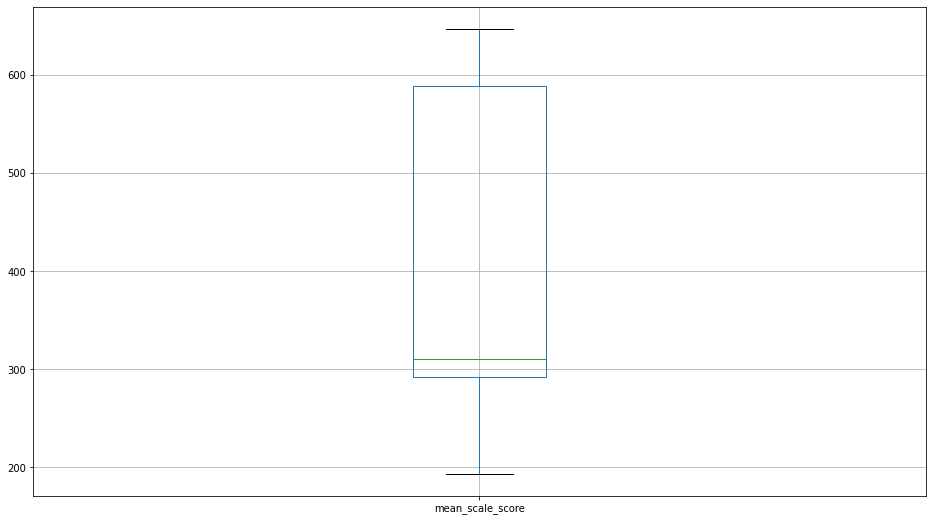

In [19]:
import matplotlib.pyplot as plt
t = ela_df
# ela_df.plot.scatter(x=ela_df.dbn,y=ela_df.mean_scale_score)
t.boxplot(column="mean_scale_score", figsize=(16,9))

In [3]:
wide_tests = exams.load_math_ela_wide()
wide_tests

,dbn,grade,year_math,category_math,number_tested_math,mean_scale_score_math,level_1_n_math,level_1_pct_math,level_2_n_math,level_2_pct_math,...,level_2_n_ela,level_2_pct_ela,level_3_n_ela,level_3_pct_ela,level_4_n_ela,level_4_pct_ela,level_3_4_n_ela,level_3_4_pct_ela,test_year_ela,charter_ela
0,01M015,3,2013,All Students,27,277.777771,16.0,59.259258,11.0,40.740742,...,11.0,40.740742,2.0,7.407407,0.0,0.0,2.0,7.407407,2013,False
1,01M015,3,2013,All Students,27,277.777771,16.0,59.259258,11.0,40.740742,...,8.0,42.105263,0.0,0.000000,0.0,0.0,0.0,0.000000,2013,False
2,01M015,3,2013,All Students,27,277.777771,16.0,59.259258,11.0,40.740742,...,3.0,37.500000,2.0,25.000000,0.0,0.0,2.0,25.000000,2013,False
3,01M015,3,2013,All Students,27,277.777771,16.0,59.259258,11.0,40.740742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,False
4,01M015,3,2013,All Students,27,277.777771,16.0,59.259258,11.0,40.740742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5516426,84X730,3,2019,All Students,51,604.000000,7.0,13.700000,12.0,23.500000,...,22.0,43.100000,23.0,45.100000,4.0,7.8,27.0,52.900000,2019,True
5516427,84X730,4,2019,All Students,47,597.000000,15.0,31.900000,10.0,21.300000,...,14.0,28.600000,13.0,26.500000,4.0,8.2,17.0,34.700000,2019,True
5516428,84X730,5,2019,All Students,53,593.000000,23.0,43.400000,13.0,24.500000,...,20.0,37.700000,8.0,15.100000,7.0,13.2,15.0,28.300000,2019,True
5516429,84X730,6,2019,All Students,110,595.000000,38.0,34.500000,30.0,27.300000,...,33.0,29.200000,23.0,20.400000,12.0,10.6,35.0,31.000000,2019,True


In [4]:
long_tests = exams.load_math_ela_long()
long_tests

,dbn,grade,year,category,number_tested,mean_scale_score,level_1_n,level_1_pct,level_2_n,level_2_pct,level_3_n,level_3_pct,level_4_n,level_4_pct,level_3_4_n,level_3_4_pct,test_year,ay,charter,exam
0,01M015,3,2013,All Students,27,277.777771,16.0,59.259258,11.0,40.740742,0.0,0.000000,0.0,0.000000,0.0,0.000000,2013,2012,False,math
7,01M015,4,2013,All Students,20,277.399994,12.0,60.000000,6.0,30.000000,1.0,5.000000,1.0,5.000000,2.0,10.000000,2013,2012,False,math
14,01M015,5,2013,All Students,24,274.000000,17.0,70.833336,6.0,25.000000,1.0,4.166667,0.0,0.000000,1.0,4.166667,2013,2012,False,math
21,01M015,All Grades,2013,All Students,71,276.394379,45.0,63.380283,23.0,32.394367,2.0,2.816901,1.0,1.408451,3.0,4.225352,2013,2012,False,math
32606,01M015,3,2013,Not SWD,19,275.736847,11.0,57.894737,8.0,42.105263,0.0,0.000000,0.0,0.000000,0.0,0.000000,2013,2012,False,math
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5326,84X730,3,2019,All Students,51,602.000000,2.0,3.900000,22.0,43.100000,23.0,45.100000,4.0,7.800000,27.0,52.900000,2019,2018,True,ela
5333,84X730,4,2019,All Students,49,591.000000,18.0,36.700000,14.0,28.600000,13.0,26.500000,4.0,8.200000,17.0,34.700000,2019,2018,True,ela
5340,84X730,5,2019,All Students,53,597.000000,18.0,34.000000,20.0,37.700000,8.0,15.100000,7.0,13.200000,15.0,28.300000,2019,2018,True,ela
5341,84X730,6,2019,All Students,113,592.000000,45.0,39.800000,33.0,29.200000,23.0,20.400000,12.0,10.600000,35.0,31.000000,2019,2018,True,ela


In [5]:
regents_df = exams.load_regents()
regents_df

,dbn,school_type,school_level,regents_exam,year,category,number_tested,mean_score,below_65_n,below_65_pct,above_64_n,above_64_pct,above_79_n,above_79_pct,college_ready_n,college_ready_pct,test_year,ay
0,01M034,General Academic,K-8,Living Environment,2015,All Students,16,77.937500,1.0,6.25,15.0,93.75,7.0,43.750000,NaN,NaN,2015,2014
1,01M034,General Academic,K-8,Living Environment,2015,Asian,6,80.000000,0.0,0.00,6.0,100.00,3.0,50.000000,NaN,NaN,2015,2014
2,01M034,General Academic,K-8,Living Environment,2015,Black,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,2014
3,01M034,General Academic,K-8,Living Environment,2015,ELL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,2014
4,01M034,General Academic,K-8,Living Environment,2015,English Proficient,10,78.800003,0.0,0.00,10.0,100.00,5.0,50.000000,NaN,NaN,2015,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361529,84X717,General Academic,K-8,Living Environment,2019,English Proficient,14,77.928574,0.0,0.00,14.0,100.00,8.0,57.142857,NaN,NaN,2019,2018
361530,84X717,General Academic,K-8,Living Environment,2019,Female,8,77.125000,0.0,0.00,8.0,100.00,5.0,62.500000,NaN,NaN,2019,2018
361531,84X717,General Academic,K-8,Living Environment,2019,Hispanic,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,2018
361532,84X717,General Academic,K-8,Living Environment,2019,Male,6,79.000000,0.0,0.00,6.0,100.00,3.0,50.000000,NaN,NaN,2019,2018
